# Learning from Data Assignment

gxnj57 (001110537)

In [122]:
#Importing all required libraries

import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import time


In [123]:
#Reading the dataset

lfd_data = pd.read_csv("lfd_2023_group14.csv")
lfd_data

mass  width  length_cm  wavelength       location  bounciness  recoil  \
0      394    188       68.0         602          Italy       75.02   46.39   
1      413    146      172.0         839          Italy        2.45   69.44   
2      213    133      123.0         537        Germany       27.56   74.77   
3      338    116      144.0         809          China       32.72   59.27   
4      381    103      150.0         718          Japan       64.07   36.08   
...    ...    ...        ...         ...            ...         ...     ...   
4995   497    119       82.0         553         France       62.45   27.54   
4996   508    154       79.0         541  United States       49.27   30.06   
4997   186    162       91.0         488        Germany       54.83   52.24   
4998   632    158       71.0         562          Italy       94.80   41.45   
4999   271    148      116.0         407  United States       44.39   14.97   

      condensation surface  distance   target  
0            51.91   bumpy     48.35  widget3  
1            30.20   bumpy     39.78  widget7  
2            33.90   bumpy     58.31  widget7  
3            71.13   bumpy     46.82  widget6  
4            66.98   spiky     30.56  widget4  
...            ...     ...       ...      ...  
4995         24.94   spiky     42.88  widget3  
4996         87.12   bumpy     30.86  widget5  
4997         75.50    flat     14.32  widget5  
4998         16.20   spiky     55.94  widget3  
4999         61.53    flat     29.49  widget5  

[5000 rows x 11 columns]

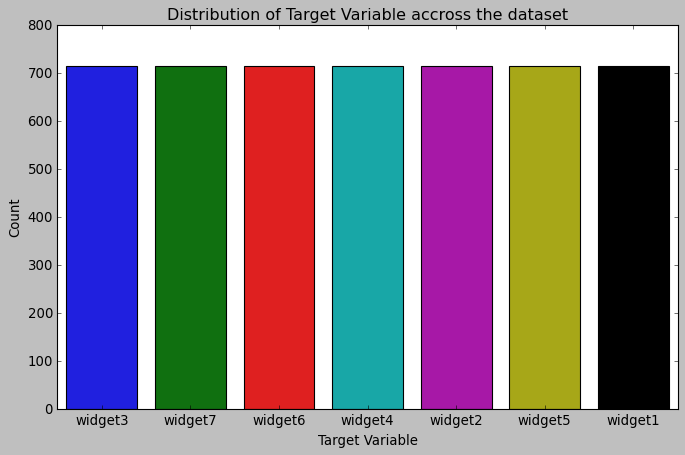

In [124]:
#Plot showing the distribution of target variable accross the dataset indicating no bias

plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=lfd_data)
plt.title('Distribution of Target Variable accross the dataset')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [125]:
#To check which all columns have null/missing values

print('Count of Null/missing values in the dataset')
print(lfd_data.isnull().sum())

#To fill up/impute all missing values with mean

lfd_data['length_cm'].fillna(lfd_data['length_cm'].mean(), inplace=True)

print('Count of Null/missing values in the dataset after cleaning data by imputing using mean')
print(lfd_data.isnull().sum())  #Checking if any values are still missing after imputing

#Converting categorical columns to integer data

lfd_data = pd.get_dummies(lfd_data, columns=["location", "surface"])

lfd_data[['location_Belgium', 'location_China', 'location_France','location_Germany','location_India','location_Italy','location_Japan', 'location_Russia', 'location_South Korea', 'location_United Kingdom', 'location_United States', 'surface_bumpy', 'surface_flat', 'surface_matte', 'surface_shiny', 'surface_spiky']] = lfd_data[['location_Belgium', 'location_China', 'location_France','location_Germany','location_India','location_Italy','location_Japan', 'location_Russia', 'location_South Korea', 'location_United Kingdom', 'location_United States', 'surface_bumpy', 'surface_flat', 'surface_matte', 'surface_shiny', 'surface_spiky']].astype(int)

print('Dataset after cleaning:')
lfd_data

Count of Null/missing values in the dataset
mass              0
width             0
length_cm       242
wavelength        0
location          0
bounciness        0
recoil            0
condensation      0
surface           0
distance          0
target            0
dtype: int64
Count of Null/missing values in the dataset after cleaning data by imputing using mean
mass            0
width           0
length_cm       0
wavelength      0
location        0
bounciness      0
recoil          0
condensation    0
surface         0
distance        0
target          0
dtype: int64
Dataset after cleaning:


mass  width  length_cm  wavelength  bounciness  recoil  condensation  \
0      394    188       68.0         602       75.02   46.39         51.91   
1      413    146      172.0         839        2.45   69.44         30.20   
2      213    133      123.0         537       27.56   74.77         33.90   
3      338    116      144.0         809       32.72   59.27         71.13   
4      381    103      150.0         718       64.07   36.08         66.98   
...    ...    ...        ...         ...         ...     ...           ...   
4995   497    119       82.0         553       62.45   27.54         24.94   
4996   508    154       79.0         541       49.27   30.06         87.12   
4997   186    162       91.0         488       54.83   52.24         75.50   
4998   632    158       71.0         562       94.80   41.45         16.20   
4999   271    148      116.0         407       44.39   14.97         61.53   

      distance   target  location_Belgium  ...  location_Japan  \
0        48.35  widget3                 0  ...               0   
1        39.78  widget7                 0  ...               0   
2        58.31  widget7                 0  ...               0   
3        46.82  widget6                 0  ...               0   
4        30.56  widget4                 0  ...               1   
...        ...      ...               ...  ...             ...   
4995     42.88  widget3                 0  ...               0   
4996     30.86  widget5                 0  ...               0   
4997     14.32  widget5                 0  ...               0   
4998     55.94  widget3                 0  ...               0   
4999     29.49  widget5                 0  ...               0   

      location_Russia  location_South Korea  location_United Kingdom  \
0                   0                     0                        0   
1                   0                     0                        0   
2                   0                     0                        0   
3                   0                     0                        0   
4                   0                     0                        0   
...               ...                   ...                      ...   
4995                0                     0                        0   
4996                0                     0                        0   
4997                0                     0                        0   
4998                0                     0                        0   
4999                0                     0                        0   

      location_United States  surface_bumpy  surface_flat  surface_matte  \
0                          0              1             0              0   
1                          0              1             0              0   
2                          0              1             0              0   
3                          0              1             0              0   
4                          0              0             0              0   
...                      ...            ...           ...            ...   
4995                       0              0             0              0   
4996                       1              1             0              0   
4997                       0              0             1              0   
4998                       0              0             0              0   
4999                       1              0             1              0   

      surface_shiny  surface_spiky  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              1  
...             ...            ...  
4995              0              1  
4996              0              0  
4997              0              0  
4998              0              1  
4999              0              0  

[5000 rows x 25 columns]

# Data Visualization

C:\Users\syeda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='recoil', ylabel='Count'>

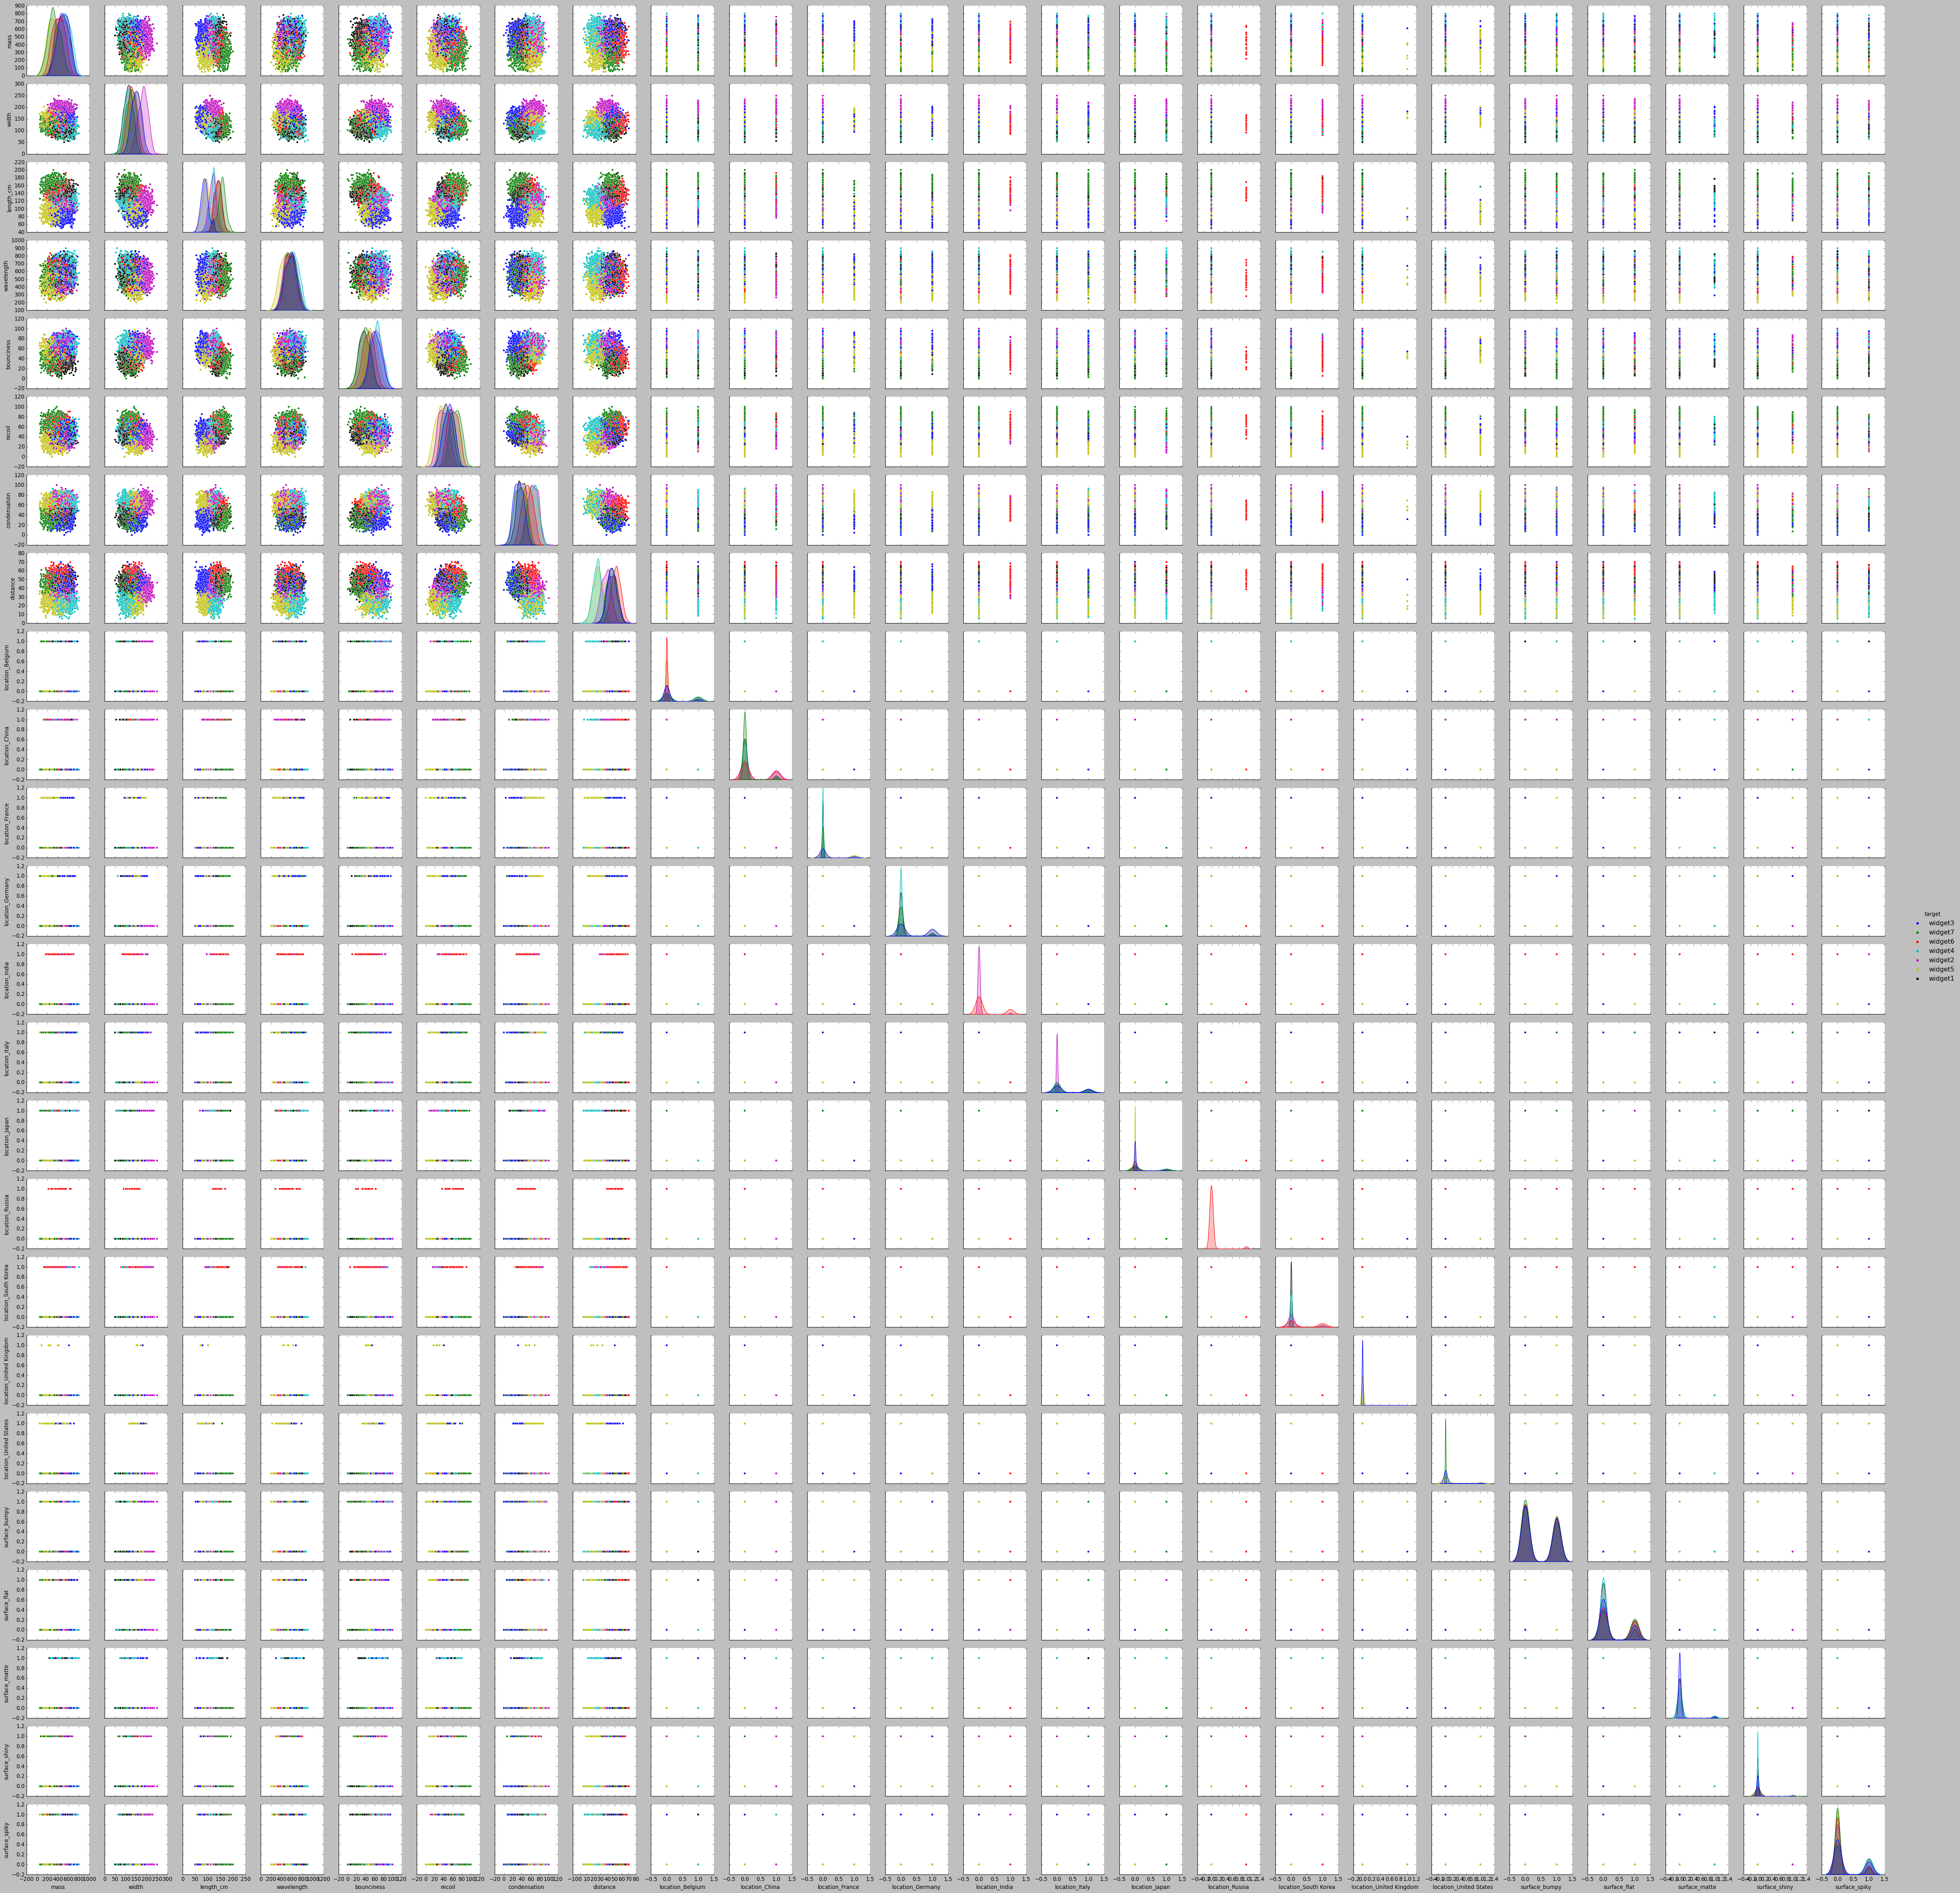

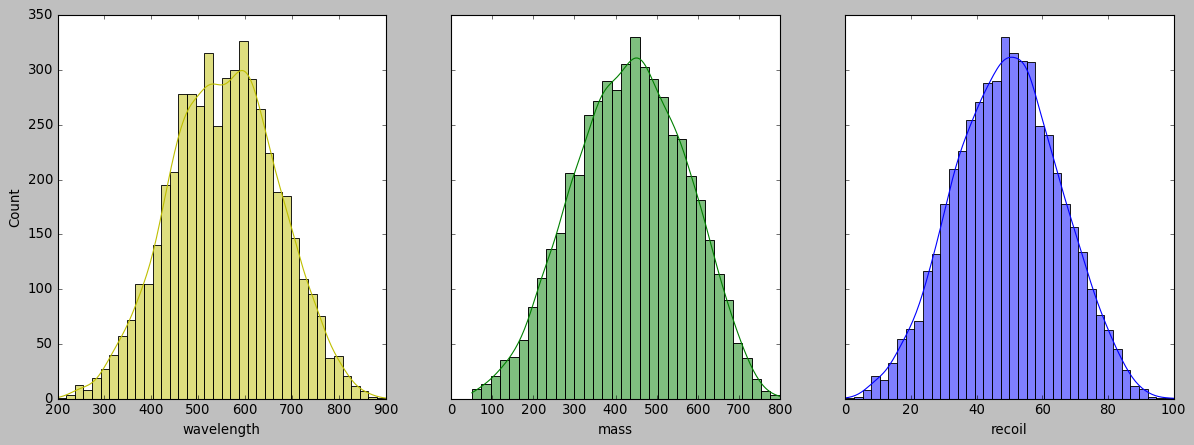

In [82]:
#Let's visualize the scatter plots using pair plot

plt.style.use('classic')
%matplotlib inline
sns.pairplot(lfd_data, hue='target');

fig,axes = plt.subplots(1,3,figsize=(18,6),sharey= True)
sns.histplot(lfd_data,ax=axes[0],x="wavelength", kde = True , color = 'y')
sns.histplot(lfd_data,ax=axes[1],x="mass", kde = True , color = 'g')
sns.histplot(lfd_data,ax=axes[2],x="recoil", kde = True , color = 'b')

# Guassian Naive Bayes Classifier

In [126]:
#Training the Guassian Naive Bayes Classifier and testing the accuracy and training time

iterations=10  #Running the loop 10 times to get an average of the training time and accuracies
accuracy_list_train=[]
accuracy_list_test=[]
training_time_list = []

datapoints=lfd_data.drop('target',axis=1).to_numpy() #features
labels=np.array(lfd_data['target']) #target

for i in range(iterations):
    #Splitting data using train_test_split
    current_test_size=0.3
    data_train, data_test, labels_train, labels_test = train_test_split(datapoints, labels, test_size=current_test_size, random_state=42)
    
    # Initialize and train the Gaussian Naive Bayes classifier
    classifier = GaussianNB()
    start_time=time.time()
    classifier.fit(data_train, labels_train)
    end_time=time.time()
    training_time = end_time - start_time
    training_time_list.append(training_time)
    print(f"Training time: {training_time} seconds")


    predictions_train = classifier.predict(data_train)
    predictions_test = classifier.predict(data_test)


    #Calculate accuracy and append to the list
    acc_train = accuracy_score(labels_train, predictions_train)
    accuracy_list_train.append(acc_train)
    acc_test = accuracy_score(labels_test, predictions_test)
    accuracy_list_test.append(acc_test)
    average_training_time = np.mean(training_time_list)
    print(f"Iteration {i+1}: Test Size = {current_test_size:.2f}, Accuracy_training = {acc_train:.4f}, Accuracy_testing = {acc_test:.4f}")

#Print the list of accuracies

print('\nAccuracy measured for Guassian Naive Bayes Classifier')
print("List of accuracies for training data:", accuracy_list_train)
print("List of accuracies for testing data:", accuracy_list_test)
print("Average Training Time: ", average_training_time, " seconds")

# Calculate the average accuracy
average_accuracy_training = np.mean(accuracy_list_train)
average_accuracy_testing = np.mean(accuracy_list_test)
print("Average Accuracy for training data:", average_accuracy_training)
print("Average Accuracy for testing data:", average_accuracy_testing)


print('Number of samples used for training features',len(data_train))
print('Number of samples used for testing features',len(data_test))
print('Number of samples used for training classes',len(labels_train))
print('Number of samples used for testing classes',len(labels_test))

Training time: 0.024653196334838867 seconds
Iteration 1: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.009195804595947266 seconds
Iteration 2: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.0070056915283203125 seconds
Iteration 3: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.007493257522583008 seconds
Iteration 4: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.008038997650146484 seconds
Iteration 5: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.009520292282104492 seconds
Iteration 6: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.010472774505615234 seconds
Iteration 7: Test Size = 0.30, Accuracy_training = 0.8643, Accuracy_testing = 0.8680
Training time: 0.011528968811035156 seconds
Iteration 8: Test Size = 0.30, Accuracy_training = 0

In [127]:
#Cross validation


scores = cross_val_score(classifier, datapoints, labels, cv=10)
scores


array([0.856, 0.852, 0.876, 0.852, 0.844, 0.892, 0.858, 0.832, 0.88 ,
       0.848])

# Confusion matrices



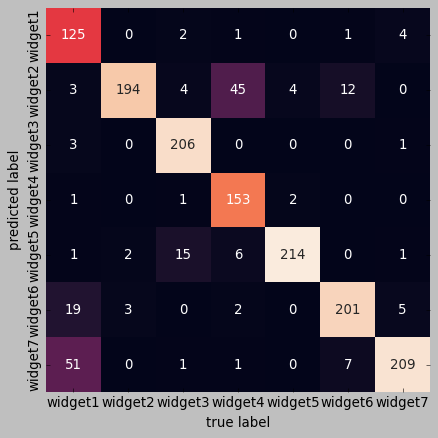

In [128]:
classes = np.unique(labels_test)  # Assuming labels_test contains the true labels

mat = confusion_matrix(labels_test, predictions_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()


# Multinomial Naive Bayes

Accuracy measured for Multinomial Naive Bayes Classifier
Training time: 0.04659748077392578 seconds
Training Accuracy: 0.7246
Testing Accuracy: 0.7360


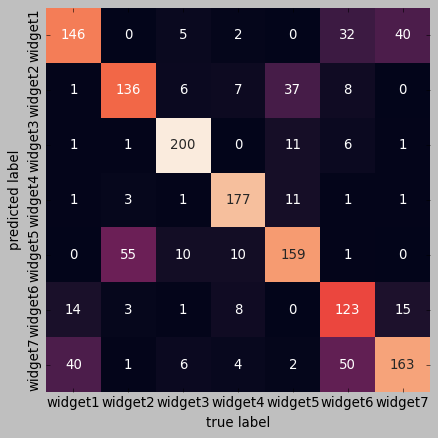

In [129]:
#Split the data into training and testing sets

data_train, data_test, labels_train, labels_test = train_test_split(datapoints, labels, test_size=0.30, random_state=42)


#Initialize and train the Multinomial Naive Bayes classifier

classifier = MultinomialNB()
start_time=time.time()
classifier.fit(datapoints, labels)
end_time=time.time()
training_time = end_time - start_time

#Make predictions on the training and testing data

predictions_train = classifier.predict(data_train)
predictions_test = classifier.predict(data_test)

#Evaluate accuracy
acc_train = accuracy_score(labels_train, predictions_train)
acc_test = accuracy_score(labels_test, predictions_test)

print('Accuracy measured for Multinomial Naive Bayes Classifier')
print(f"Training time: {training_time} seconds")
print(f"Training Accuracy: {acc_train:.4f}")
print(f"Testing Accuracy: {acc_test:.4f}")

classes = np.unique(labels_test)  
mat = confusion_matrix(labels_test, predictions_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()


# GNB vs MNB (Training time and accuracy)

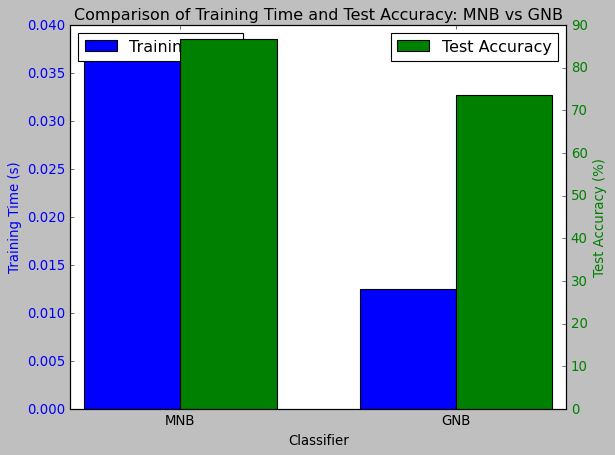

In [130]:
import matplotlib.pyplot as plt
import numpy as np

training_times = [0.0364, 0.0125]
test_accuracies = [86.81, 73.60]
labels = ['MNB', 'GNB']

ind = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Bar graph for training times
rects1 = ax1.bar(ind - width/2, training_times, width, label='Training Time', color='b')

# Make a twin axis for test accuracies
ax2 = ax1.twinx()
rects2 = ax2.bar(ind + width/2, test_accuracies, width, label='Test Accuracy', color='g')

# Labels, Title and Custom x-axis tick labels
ax1.set_ylabel('Training Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2.set_ylabel('Test Accuracy (%)', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax1.set_xticks(ind)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Classifier')
plt.title('Comparison of Training Time and Test Accuracy: MNB vs GNB')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the graph
plt.show()


# Neural Networks

In [12]:
X_train.shape[1] # checking the number of features

24

In [131]:
#import all libraries

import tensorflow as tensorflow
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models



datapoints=lfd_data.drop('target',axis=1).to_numpy() #features
labels=np.array(lfd_data['target']) #target

#Spliting  the data into train test: 
X_train, X_val, y_train, y_val = train_test_split(datapoints, labels, test_size=0.3, random_state=42)


#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [132]:
#Model1: 

model1 = models.Sequential()
model1.add(layers.Input(shape=(X_train.shape[1],)))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(7, activation='softmax'))



#Compiling the model
model1.compile(optimizer=Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

start_time=time.time()
#Model Training 
history1 = model1.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))

y_pred1 = np.argmax(model1.predict(X_val_scaled), axis=-1)
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_1 = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_1}')
print(f'Training time: {training_time}')
model1.summary()



Epoch 1/10
88/88 [==============================] - 2s 8ms/step - loss: 2.2803 - accuracy: 0.3000 - val_loss: 1.8518 - val_accuracy: 0.2000
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 2.0736 - accuracy: 0.1669 - val_loss: 1.9235 - val_accuracy: 0.1527
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0054 - accuracy: 0.1520 - val_loss: 1.9273 - val_accuracy: 0.1487
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 2.2747 - accuracy: 0.1603 - val_loss: 1.9524 - val_accuracy: 0.1473
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9628 - accuracy: 0.1309 - val_loss: 1.9563 - val_accuracy: 0.1353
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 1.9565 - accuracy: 0.1414 - val_loss: 1.9515 - val_accuracy: 0.1327
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9805 - accuracy: 0.1486 - val_loss: 1.9521 - val_accuracy: 0.1353
Epoch 8/10
88/88 [==

In [133]:
#Model 2

model2 = models.Sequential()
model2.add(layers.Input(shape=(X_train.shape[1],)))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model2.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model2.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time=time.time()
#Model Training 
history2 = model2.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred2 = np.argmax(model2.predict(X_val_scaled), axis=-1)

 
y_pred_labels2 = label_encoder.inverse_transform(y_pred2)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_2 = accuracy_score(y_val, y_pred_labels2)
print(f'Test Accuracy: {Accuracy_2}')
print(f'Training time: {training_time}')
model2.summary()

Epoch 1/10
88/88 [==============================] - 2s 7ms/step - loss: 0.4865 - accuracy: 0.8340 - val_loss: 0.2132 - val_accuracy: 0.9113
Epoch 2/10
88/88 [==============================] - 1s 9ms/step - loss: 0.2437 - accuracy: 0.9117 - val_loss: 0.1970 - val_accuracy: 0.9260
Epoch 3/10
88/88 [==============================] - 1s 6ms/step - loss: 0.2208 - accuracy: 0.9223 - val_loss: 0.1955 - val_accuracy: 0.9220
Epoch 4/10
88/88 [==============================] - 1s 7ms/step - loss: 0.2202 - accuracy: 0.9191 - val_loss: 0.1961 - val_accuracy: 0.9247
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9263 - val_loss: 0.1987 - val_accuracy: 0.9227
Epoch 6/10
88/88 [==============================] - 1s 10ms/step - loss: 0.2314 - accuracy: 0.9229 - val_loss: 0.2145 - val_accuracy: 0.9220
Epoch 7/10
88/88 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.9257 - val_loss: 0.2062 - val_accuracy: 0.9247
Epoch 8/10
88/88 [=

In [134]:
#Model 3

model3 = models.Sequential()
model3.add(layers.Input(shape=(X_train.shape[1],)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model3.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time=time.time()
#Model Training 
history3 = model3.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred3 = np.argmax(model3.predict(X_val_scaled), axis=-1)

 
y_pred_labels3 = label_encoder.inverse_transform(y_pred3)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_3 = accuracy_score(y_val, y_pred_labels3)
print(f'Test Accuracy: {Accuracy_3}')
print(f'Training time: {training_time}')
model3.summary()

Epoch 1/10
88/88 [==============================] - 2s 8ms/step - loss: 1.5958 - accuracy: 0.4040 - val_loss: 0.8687 - val_accuracy: 0.8553
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.8609 - accuracy: 0.7146 - val_loss: 0.3799 - val_accuracy: 0.9080
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.8046 - val_loss: 0.2644 - val_accuracy: 0.9200
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.8426 - val_loss: 0.2215 - val_accuracy: 0.9273
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.8651 - val_loss: 0.2085 - val_accuracy: 0.9233
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3621 - accuracy: 0.8811 - val_loss: 0.1982 - val_accuracy: 0.9293
Epoch 7/10
88/88 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8803 - val_loss: 0.1922 - val_accuracy: 0.9260
Epoch 8/10
88/88 [==

In [135]:
#Model 4

model4 = models.Sequential()
model4.add(layers.Input(shape=(X_train.shape[1],)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model4.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model Training 
start_time=time.time()
history4 = model4.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=100,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred4 = np.argmax(model4.predict(X_val_scaled), axis=-1)

 
y_pred_labels4 = label_encoder.inverse_transform(y_pred4)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_4 = accuracy_score(y_val, y_pred_labels4)
print(f'Test Accuracy: {Accuracy_4}')
print(f'Training time: {training_time}')
model4.summary()

Epoch 1/100
88/88 [==============================] - 2s 8ms/step - loss: 1.0970 - accuracy: 0.6060 - val_loss: 0.2534 - val_accuracy: 0.9067
Epoch 2/100
88/88 [==============================] - 1s 8ms/step - loss: 0.5545 - accuracy: 0.8131 - val_loss: 0.2154 - val_accuracy: 0.9253
Epoch 3/100
88/88 [==============================] - 1s 8ms/step - loss: 0.4728 - accuracy: 0.8454 - val_loss: 0.2233 - val_accuracy: 0.9213
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8574 - val_loss: 0.2078 - val_accuracy: 0.9280
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3958 - accuracy: 0.8723 - val_loss: 0.2011 - val_accuracy: 0.9280
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8680 - val_loss: 0.2104 - val_accuracy: 0.9280
Epoch 7/100
88/88 [==============================] - 0s 6ms/step - loss: 0.3688 - accuracy: 0.8834 - val_loss: 0.1973 - val_accuracy: 0.9287
Epoch 8/100
8

In [136]:
#Model 5

model5 = models.Sequential()
model5.add(layers.Input(shape=(X_train.shape[1],)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model5.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time=time.time()
#Model Training 
history5 = model5.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=25,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred5 = np.argmax(model5.predict(X_val_scaled), axis=-1)

 
y_pred_labels5 = label_encoder.inverse_transform(y_pred5)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_5 = accuracy_score(y_val, y_pred_labels5)
print(f'Test Accuracy: {Accuracy_5}')
print(f'Training time: {training_time}')
model5.summary()

Epoch 1/25
88/88 [==============================] - 2s 9ms/step - loss: 1.0216 - accuracy: 0.6300 - val_loss: 0.2479 - val_accuracy: 0.9267
Epoch 2/25
88/88 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.8206 - val_loss: 0.2302 - val_accuracy: 0.9173
Epoch 3/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.8397 - val_loss: 0.2243 - val_accuracy: 0.9187
Epoch 4/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8626 - val_loss: 0.2029 - val_accuracy: 0.9207
Epoch 5/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4225 - accuracy: 0.8666 - val_loss: 0.2034 - val_accuracy: 0.9347
Epoch 6/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8674 - val_loss: 0.2141 - val_accuracy: 0.9240
Epoch 7/25
88/88 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8789 - val_loss: 0.2088 - val_accuracy: 0.9227
Epoch 8/25
88/88 [==

In [137]:
#Model 6

model6 = models.Sequential()
model6.add(layers.Input(shape=(X_train.shape[1],)))
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(32, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model6.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model Training 
start_time=time.time()
history6 = model6.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred6 = np.argmax(model6.predict(X_val_scaled), axis=-1)

 
y_pred_labels6 = label_encoder.inverse_transform(y_pred6)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_6 = accuracy_score(y_val, y_pred_labels6)
print(f'Test Accuracy: {Accuracy_6}')
print(f'Training time: {training_time}')
model6.summary()

Epoch 1/10
88/88 [==============================] - 2s 7ms/step - loss: 1.0374 - accuracy: 0.6260 - val_loss: 0.2753 - val_accuracy: 0.9140
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.8237 - val_loss: 0.2280 - val_accuracy: 0.9167
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8537 - val_loss: 0.2125 - val_accuracy: 0.9233
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.8554 - val_loss: 0.2093 - val_accuracy: 0.9233
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.8680 - val_loss: 0.2128 - val_accuracy: 0.9253
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.8783 - val_loss: 0.2045 - val_accuracy: 0.9280
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8754 - val_loss: 0.2258 - val_accuracy: 0.9213
Epoch 8/10
88/88 [==

In [138]:
#Model 7

model7 = models.Sequential()
model7.add(layers.Input(shape=(X_train.shape[1],)))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model7.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model Training 
start_time=time.time()
history7 = model7.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=70,validation_data=(X_val_scaled, y_val_encoded))


y_pred7 = np.argmax(model7.predict(X_val_scaled), axis=-1)

y_pred_labels7 = label_encoder.inverse_transform(y_pred7)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_7 = accuracy_score(y_val, y_pred_labels7)
print(f'Test Accuracy: {Accuracy_7}')
print(f'Training time: {training_time}')
model7.summary()

Epoch 1/20
50/50 [==============================] - 1s 9ms/step - loss: 1.2879 - accuracy: 0.5317 - val_loss: 0.3122 - val_accuracy: 0.9080
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.8134 - val_loss: 0.2228 - val_accuracy: 0.9227
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.8489 - val_loss: 0.2089 - val_accuracy: 0.9240
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8680 - val_loss: 0.2236 - val_accuracy: 0.9207
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8760 - val_loss: 0.2245 - val_accuracy: 0.9153
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.3768 - accuracy: 0.8777 - val_loss: 0.2257 - val_accuracy: 0.9140
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.3852 - accuracy: 0.8786 - val_loss: 0.2072 - val_accuracy: 0.9227
Epoch 8/20
50/50 [==

In [139]:
#Model 8

model8 = models.Sequential()
model8.add(layers.Input(shape=(X_train.shape[1],)))
model8.add(layers.Dense(64, activation='relu'))
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(32, activation='relu'))
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model8.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time=time.time()
#Model Training 
history8 = model8.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))


y_pred8 = np.argmax(model8.predict(X_val_scaled), axis=-1)

y_pred_labels8 = label_encoder.inverse_transform(y_pred8)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_8 = accuracy_score(y_val, y_pred_labels8)
print(f'Test Accuracy: {Accuracy_8}')
print(f'Training time: {training_time}')
model8.summary()

Epoch 1/20
88/88 [==============================] - 2s 7ms/step - loss: 1.0104 - accuracy: 0.6260 - val_loss: 0.2489 - val_accuracy: 0.9140
Epoch 2/20
88/88 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.8174 - val_loss: 0.2455 - val_accuracy: 0.9167
Epoch 3/20
88/88 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8503 - val_loss: 0.2150 - val_accuracy: 0.9233
Epoch 4/20
88/88 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8654 - val_loss: 0.2090 - val_accuracy: 0.9227
Epoch 5/20
88/88 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8677 - val_loss: 0.2120 - val_accuracy: 0.9207
Epoch 6/20
88/88 [==============================] - 0s 4ms/step - loss: 0.3736 - accuracy: 0.8837 - val_loss: 0.1955 - val_accuracy: 0.9280
Epoch 7/20
88/88 [==============================] - 1s 6ms/step - loss: 0.3619 - accuracy: 0.8840 - val_loss: 0.2109 - val_accuracy: 0.9247
Epoch 8/20
88/88 [==

In [140]:
#Model 9

model9 = models.Sequential()
model9.add(layers.Input(shape=(X_train.shape[1],)))
model9.add(layers.Dense(64, activation='relu'))
model9.add(layers.Dropout(0.5))
model9.add(layers.Dense(32, activation='relu'))
model9.add(layers.Dropout(0.5))
model9.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model9.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start_time=time.time()
#Model Training 
history9 = model9.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=20,validation_data=(X_val_scaled, y_val_encoded))


y_pred9 = np.argmax(model9.predict(X_val_scaled), axis=-1)

y_pred_labels9 = label_encoder.inverse_transform(y_pred9)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_9 = accuracy_score(y_val, y_pred_labels9)
print(f'Test Accuracy: {Accuracy_9}')
print(f'Training time: {training_time}')
model9.summary()

Epoch 1/20
175/175 [==============================] - 2s 5ms/step - loss: 0.9514 - accuracy: 0.6520 - val_loss: 0.2647 - val_accuracy: 0.8993
Epoch 2/20
175/175 [==============================] - 1s 4ms/step - loss: 0.5636 - accuracy: 0.8126 - val_loss: 0.2558 - val_accuracy: 0.9093
Epoch 3/20
175/175 [==============================] - 1s 4ms/step - loss: 0.4854 - accuracy: 0.8377 - val_loss: 0.2303 - val_accuracy: 0.9247
Epoch 4/20
175/175 [==============================] - 1s 5ms/step - loss: 0.4406 - accuracy: 0.8560 - val_loss: 0.2208 - val_accuracy: 0.9227
Epoch 5/20
175/175 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.8617 - val_loss: 0.2129 - val_accuracy: 0.9213
Epoch 6/20
175/175 [==============================] - 1s 4ms/step - loss: 0.4509 - accuracy: 0.8551 - val_loss: 0.2208 - val_accuracy: 0.9220
Epoch 7/20
175/175 [==============================] - 1s 3ms/step - loss: 0.3850 - accuracy: 0.8723 - val_loss: 0.2337 - val_accuracy: 0.9173
Epoch 

In [141]:
#Model 10

model10 = models.Sequential()
model10.add(layers.Input(shape=(X_train.shape[1],)))
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(32, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model10.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history10 = model10.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))

y_pred10 = np.argmax(model10.predict(X_val_scaled), axis=-1)

y_pred_labels10 = label_encoder.inverse_transform(y_pred10)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_10 = accuracy_score(y_val, y_pred_labels10)
print(f'Test Accuracy: {Accuracy_10}')
print(f'Training time: {training_time}')
model10.summary()

Epoch 1/10
88/88 [==============================] - 3s 9ms/step - loss: 1.1446 - accuracy: 0.5717 - val_loss: 0.2903 - val_accuracy: 0.9080
Epoch 2/10
88/88 [==============================] - 1s 6ms/step - loss: 0.6237 - accuracy: 0.8043 - val_loss: 0.3042 - val_accuracy: 0.9060
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.8249 - val_loss: 0.2354 - val_accuracy: 0.9220
Epoch 4/10
88/88 [==============================] - 0s 6ms/step - loss: 0.5029 - accuracy: 0.8546 - val_loss: 0.2822 - val_accuracy: 0.9113
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.8597 - val_loss: 0.2511 - val_accuracy: 0.9153
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.4792 - accuracy: 0.8589 - val_loss: 0.2505 - val_accuracy: 0.9240
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 0.4522 - accuracy: 0.8697 - val_loss: 0.2395 - val_accuracy: 0.9193
Epoch 8/10
88/88 [==

In [142]:
#Model 11

model11 = models.Sequential()
model11.add(layers.Input(shape=(X_train.shape[1],)))
model11.add(layers.Dense(128, activation='relu'))
model11.add(layers.Dropout(0.5))
model11.add(layers.Dense(64, activation='relu'))
model11.add(layers.Dropout(0.5))
model11.add(layers.Dense(32, activation='relu'))
model11.add(layers.Dropout(0.5))
model11.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model11.compile(optimizer=Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history11= model11.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))

y_pred11 = np.argmax(model11.predict(X_val_scaled), axis=-1)

y_pred_labels11 = label_encoder.inverse_transform(y_pred11)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_11 = accuracy_score(y_val, y_pred_labels11)
print(f'Test Accuracy: {Accuracy_11}')
print(f'Training time: {training_time}')
model11.summary()

Epoch 1/10
88/88 [==============================] - 2s 8ms/step - loss: 2.3700 - accuracy: 0.1411 - val_loss: 1.9488 - val_accuracy: 0.1353
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 1.9556 - accuracy: 0.1454 - val_loss: 1.9510 - val_accuracy: 0.1353
Epoch 3/10
88/88 [==============================] - 0s 6ms/step - loss: 1.9772 - accuracy: 0.1366 - val_loss: 1.9496 - val_accuracy: 0.1387
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 1.9977 - accuracy: 0.1451 - val_loss: 1.9601 - val_accuracy: 0.1467
Epoch 5/10
88/88 [==============================] - 0s 6ms/step - loss: 1.9555 - accuracy: 0.1380 - val_loss: 1.9546 - val_accuracy: 0.1353
Epoch 6/10
88/88 [==============================] - 1s 6ms/step - loss: 1.9639 - accuracy: 0.1391 - val_loss: 1.9581 - val_accuracy: 0.1327
Epoch 7/10
88/88 [==============================] - 0s 5ms/step - loss: 2.2362 - accuracy: 0.1317 - val_loss: 1.9545 - val_accuracy: 0.1387
Epoch 8/10
88/88 [==

In [143]:
#Model 12

model12 = models.Sequential()
model12.add(layers.Input(shape=(X_train.shape[1],)))
model12.add(layers.Dense(128, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(64, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(32, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model12.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history12= model12.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=10,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))

y_pred12 = np.argmax(model12.predict(X_val_scaled), axis=-1)

y_pred_labels12 = label_encoder.inverse_transform(y_pred12)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_12 = accuracy_score(y_val, y_pred_labels12)
print(f'Test Accuracy: {Accuracy_12}')
print(f'Training time: {training_time}')
model12.summary()

Epoch 1/10
88/88 [==============================] - 3s 12ms/step - loss: 1.8827 - accuracy: 0.2474 - val_loss: 1.4830 - val_accuracy: 0.7580
Epoch 2/10
88/88 [==============================] - 0s 6ms/step - loss: 1.4728 - accuracy: 0.4371 - val_loss: 0.8246 - val_accuracy: 0.8600
Epoch 3/10
88/88 [==============================] - 1s 7ms/step - loss: 1.1211 - accuracy: 0.5769 - val_loss: 0.4739 - val_accuracy: 0.9040
Epoch 4/10
88/88 [==============================] - 1s 7ms/step - loss: 0.8361 - accuracy: 0.6914 - val_loss: 0.3239 - val_accuracy: 0.9147
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.7449 - val_loss: 0.2732 - val_accuracy: 0.9253
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.7823 - val_loss: 0.2549 - val_accuracy: 0.9207
Epoch 7/10
88/88 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.8080 - val_loss: 0.2335 - val_accuracy: 0.9233
Epoch 8/10
88/88 [=

In [144]:
#Model 13

model13 = models.Sequential()
model13.add(layers.Input(shape=(X_train.shape[1],)))
model13.add(layers.Dense(64, activation='relu'))
model13.add(layers.Dropout(0.5))
model13.add(layers.Dense(32, activation='relu'))
model13.add(layers.Dropout(0.5))
model13.add(layers.Dense(16, activation='relu'))
model13.add(layers.Dropout(0.5))
model13.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model13.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history13= model13.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=100,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))

y_pred13 = np.argmax(model13.predict(X_val_scaled), axis=-1)

y_pred_labels13 = label_encoder.inverse_transform(y_pred13)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_13 = accuracy_score(y_val, y_pred_labels13)
print(f'Test Accuracy: {Accuracy_13}')
print(f'Training time: {training_time}')
model13.summary()

Epoch 1/100
88/88 [==============================] - 2s 8ms/step - loss: 1.6177 - accuracy: 0.3694 - val_loss: 0.5994 - val_accuracy: 0.8660
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 1.0359 - accuracy: 0.6157 - val_loss: 0.3669 - val_accuracy: 0.8887
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.8391 - accuracy: 0.6840 - val_loss: 0.3596 - val_accuracy: 0.8980
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.8058 - accuracy: 0.7034 - val_loss: 0.3305 - val_accuracy: 0.9133
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.7288 - accuracy: 0.7349 - val_loss: 0.3266 - val_accuracy: 0.9053
Epoch 6/100
88/88 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.7500 - val_loss: 0.2987 - val_accuracy: 0.9180
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.7697 - val_loss: 0.2794 - val_accuracy: 0.9253
Epoch 8/100
8

In [145]:
#Model 14

model14 = models.Sequential()
model14.add(layers.Input(shape=(X_train.shape[1],)))
model14.add(layers.Dense(64, activation='relu'))
model14.add(layers.Dropout(0.5))
model14.add(layers.Dense(32, activation='relu'))
model14.add(layers.Dropout(0.5))
model14.add(layers.Dense(16, activation='relu'))
model14.add(layers.Dropout(0.5))
model14.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model14.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history14= model14.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=50,batch_size=30,validation_data=(X_val_scaled, y_val_encoded))

y_pred14 = np.argmax(model14.predict(X_val_scaled), axis=-1)

y_pred_labels14 = label_encoder.inverse_transform(y_pred14)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_14 = accuracy_score(y_val, y_pred_labels14)
print(f'Test Accuracy: {Accuracy_14}')
print(f'Training time: {training_time}')
model14.summary()

Epoch 1/50
117/117 [==============================] - 2s 7ms/step - loss: 1.6402 - accuracy: 0.3449 - val_loss: 0.7584 - val_accuracy: 0.7553
Epoch 2/50
117/117 [==============================] - 1s 4ms/step - loss: 1.0737 - accuracy: 0.6014 - val_loss: 0.4777 - val_accuracy: 0.8527
Epoch 3/50
117/117 [==============================] - 0s 4ms/step - loss: 0.8321 - accuracy: 0.6980 - val_loss: 0.3381 - val_accuracy: 0.8960
Epoch 4/50
117/117 [==============================] - 0s 4ms/step - loss: 0.7751 - accuracy: 0.7166 - val_loss: 0.3387 - val_accuracy: 0.9067
Epoch 5/50
117/117 [==============================] - 1s 5ms/step - loss: 0.7580 - accuracy: 0.7254 - val_loss: 0.3233 - val_accuracy: 0.9027
Epoch 6/50
117/117 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.7440 - val_loss: 0.2756 - val_accuracy: 0.9247
Epoch 7/50
117/117 [==============================] - 1s 5ms/step - loss: 0.7148 - accuracy: 0.7471 - val_loss: 0.2872 - val_accuracy: 0.9147
Epoch 

In [68]:
#Model 15

model15 = models.Sequential()
model15.add(layers.Input(shape=(X_train.shape[1],)))
model15.add(layers.Dense(64, activation='relu'))
model15.add(layers.Dropout(0.5))
model15.add(layers.Dense(32, activation='relu'))
model15.add(layers.Dropout(0.5))
model15.add(layers.Dense(16, activation='relu'))
model15.add(layers.Dropout(0.5))
model15.add(layers.Dense(7, activation='softmax'))

#Compiling the model
model15.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


start_time=time.time()
#Model Training 
history15= model15.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=20,validation_data=(X_val_scaled, y_val_encoded))

y_pred15 = np.argmax(model15.predict(X_val_scaled), axis=-1)

y_pred_labels15 = label_encoder.inverse_transform(y_pred15)
training_time=time.time()-start_time
# Accuracy Score
Accuracy_15 = accuracy_score(y_val, y_pred_labels15)
print(f'Test Accuracy: {Accuracy_15}')
print(f'Training time: {training_time}')
model15.summary()

Epoch 1/20
175/175 [==============================] - 3s 8ms/step - loss: 1.4888 - accuracy: 0.4086 - val_loss: 0.5409 - val_accuracy: 0.8773
Epoch 2/20
175/175 [==============================] - 1s 5ms/step - loss: 0.9620 - accuracy: 0.6397 - val_loss: 0.3657 - val_accuracy: 0.8847
Epoch 3/20
175/175 [==============================] - 1s 5ms/step - loss: 0.8811 - accuracy: 0.6917 - val_loss: 0.3532 - val_accuracy: 0.8960
Epoch 4/20
175/175 [==============================] - 1s 5ms/step - loss: 0.8277 - accuracy: 0.7037 - val_loss: 0.3626 - val_accuracy: 0.8920
Epoch 5/20
175/175 [==============================] - 1s 5ms/step - loss: 0.7614 - accuracy: 0.7326 - val_loss: 0.3226 - val_accuracy: 0.9147
Epoch 6/20
175/175 [==============================] - 1s 5ms/step - loss: 0.7575 - accuracy: 0.7351 - val_loss: 0.3173 - val_accuracy: 0.9000
Epoch 7/20
175/175 [==============================] - 1s 5ms/step - loss: 0.7518 - accuracy: 0.7454 - val_loss: 0.3011 - val_accuracy: 0.9147
Epoch 

# Training loss vs Epoch comparison

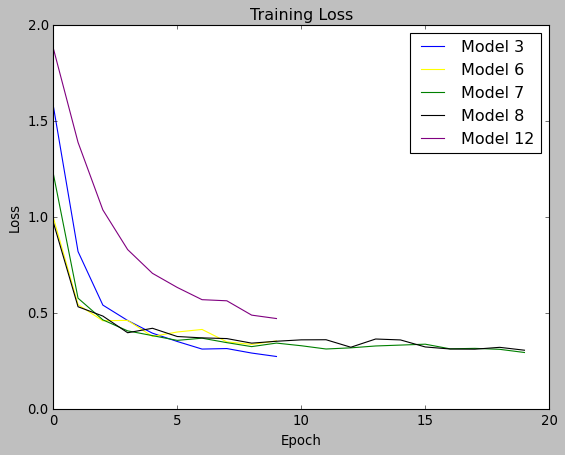

In [114]:
f, (ax1) = plt.subplots(1, 1)
ax1.plot(history3.history['loss'],color='blue',linestyle = 'solid')
ax1.plot(history6.history['loss'],color='yellow',linestyle = 'solid')
ax1.plot(history7.history['loss'],color='green',linestyle = 'solid')
ax1.plot(history8.history['loss'],color='black',linestyle = 'solid')
ax1.plot(history12.history['loss'],color='purple',linestyle = 'solid')
ax1.set(title='Training Loss',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0)
ax1.legend(['Model 3', 'Model 6', 'Model 7', 'Model 8', 'Model 12'])
plt.show()


# Validation Accuracy vs Epoch Comparison

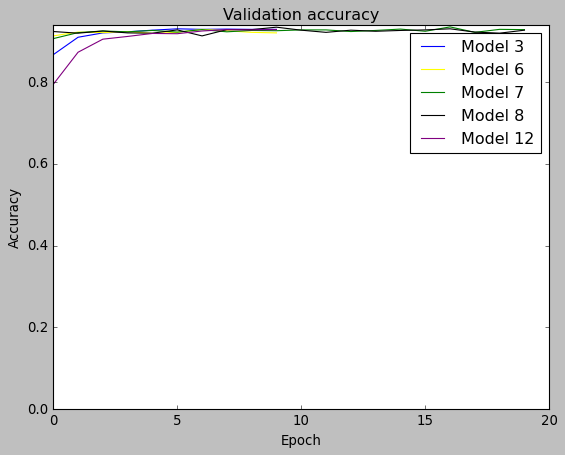

In [113]:
f, (ax1) = plt.subplots(1, 1)
ax1.plot(history3.history['val_accuracy'],color='blue',linestyle = 'solid')
ax1.plot(history6.history['val_accuracy'],color='yellow',linestyle = 'solid')
ax1.plot(history7.history['val_accuracy'],color='green',linestyle = 'solid')
ax1.plot(history8.history['val_accuracy'],color='black',linestyle = 'solid')
ax1.plot(history12.history['val_accuracy'],color='purple',linestyle = 'solid')
ax1.set(title='Validation accuracy',xlabel='Epoch',ylabel='Accuracy')
ax1.set_ylim(bottom=0)
ax1.legend(['Model 3', 'Model 6', 'Model 7', 'Model 8', 'Model 12'])
plt.show()

# Comparioson of model accuracies (GNB, MNB, NN)

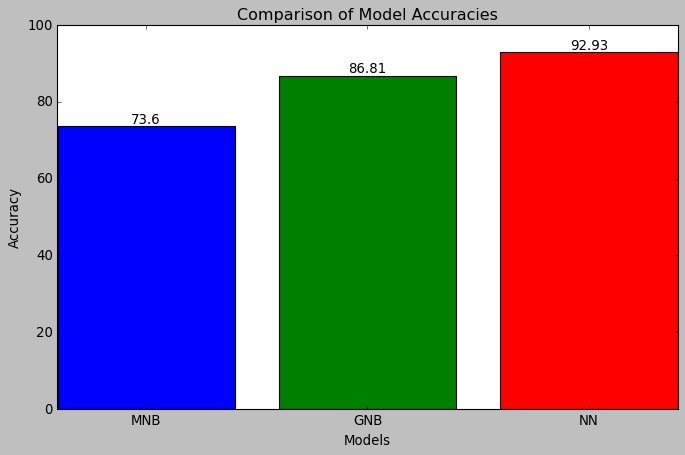

In [116]:
#Comparison of MNB, GNB and NN

mnb_accuracy = 73.6
gnb_accuracy = 86.81
nn_accuracy = 92.93

# Model names
models = ['MNB', 'GNB', 'NN']

# Accuracies
accuracies = [mnb_accuracy, gnb_accuracy, nn_accuracy]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding the title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()


# Comparioson of model training times (GNB, MNB, NN)

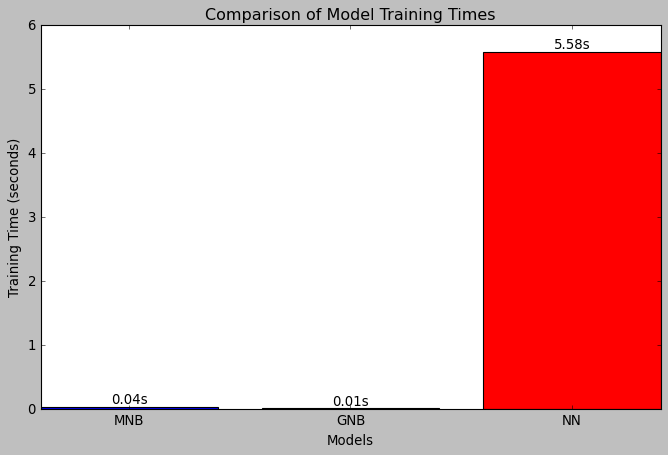

In [121]:
import matplotlib.pyplot as plt

mnb_training_time = 0.0364  
gnb_training_time = 0.0125  
nn_training_time = 5.579   

# Model names
models = ['MNB', 'GNB', 'NN']

# Training times
training_times = [mnb_training_time, gnb_training_time, nn_training_time]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, training_times, color=['blue', 'green', 'red'])

# Adding the title and labels
plt.title('Comparison of Model Training Times')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')

# Display the values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}s", ha='center', va='bottom')

# Show the plot
plt.show()
